## Регулярные выражения

*Трошин Даниил, НИУ ВШЭ*

**Регулярные выражения** – инструмент для поиска и замены текстовых фрагментов. В Питоне работа с ними реализована в библиотеке `re`.

In [ ]:
import re

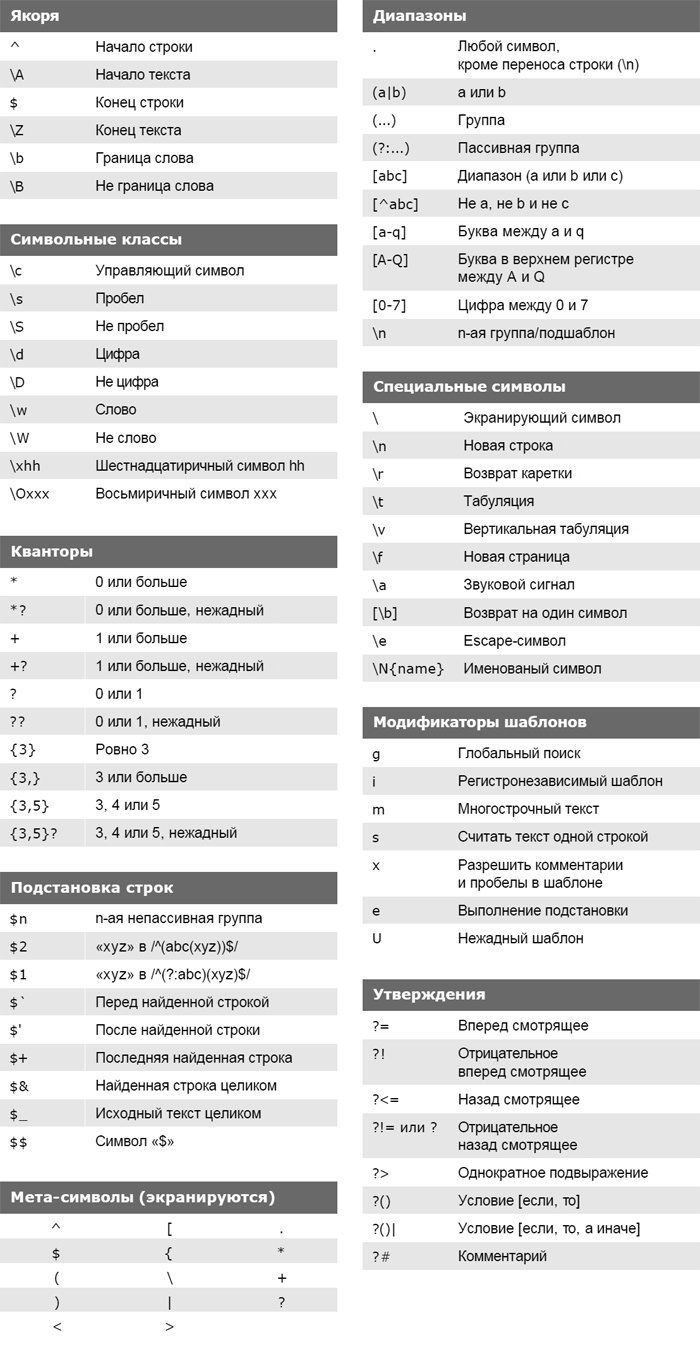

Допустим, нам нужно почистить текст от ненужных символов: тех же знаков препинания.

In [ ]:
stroka = "Это был человек лет тридцати двух-трех от роду, среднего роста, приятной наружности, с темно-серыми глазами, но с отсутствием всякой определенной идеи, всякой сосредоточенности в чертах лица. Мысль гуляла вольной птицей по лицу, порхала в глазах, садилась на полуотворенные губы, пряталась в складках лба, потом совсем пропадала, и тогда во всем лице теплился ровный свет беспечности. С лица беспечность переходила в позы всего тела, даже в складки шлафрока."

In [ ]:
re.sub('[^a-zа-я]+', ' ', stroka.lower())

'это был человек лет тридцати двух трех от роду среднего роста приятной наружности с темно серыми глазами но с отсутствием всякой определенной идеи всякой сосредоточенности в чертах лица мысль гуляла вольной птицей по лицу порхала в глазах садилась на полуотворенные губы пряталась в складках лба потом совсем пропадала и тогда во всем лице теплился ровный свет беспечности с лица беспечность переходила в позы всего тела даже в складки шлафрока '

Что мы сделали? Использовали функцию `re.sub(pattern, repl, string)`, заменяющую паттерн `pattern` на строку `repl` в тексте `string`. В данном случае мы все знаки препинания заменили на пробелы (т.е. фактически убрали их).

Почему наш паттерн выглядел как `[^a-zа-я]+`? Крышечка означает отрицание; под отрицанием буквенный диапазон (т.е. берём всё, что не буквы); символ `+` значит, что указанных символов (знаков препинания) может быть 1 или больше.

Теперь мы можем написать функцию для предобработки текста с использованием регулярных выражений и применить её к датасету.

In [ ]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 58.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# загрузка дополнительных ресурсов NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
poems = pd.read_csv('poems.csv')
poems

,writer,poem,text
0,Лермонтов Михаил Юрьевич,Любовь мертвеца,NaN
1,Лермонтов Михаил Юрьевич,На серебряные шпоры…,На серебряные шпоры\nЯ в раздумии гляжу;\nЗа т...
2,Лермонтов Михаил Юрьевич,Вид гор из степей Козлова,Пилигрим\nАллах ли там среди пустыни\nЗастывши...
3,Лермонтов Михаил Юрьевич,"К (О, не скрывай! Ты плакала об нем…)","О, не скрывай! Ты плакала об нем –\nИ я его лю..."
4,Лермонтов Михаил Юрьевич,"Жалобы турка (письмо к другу, иностранцу)","Ты знал ли дикий край, под знойными лучами,\nГ..."
...,...,...,...
19311,Владислав Фелицианович Ходасевич,Прогулка,"Хорошо, что в этом мире\nЕсть магические ночи,..."
19312,Владислав Фелицианович Ходасевич,Пробочка,Пробочка над крепким иодом!\nКак ты скоро пере...
19313,Владислав Фелицианович Ходасевич,"Друзья, друзья! Быть может, скоро…","Друзья, друзья! Быть может, скоро —\nИ не во с..."
19314,Владислав Фелицианович Ходасевич,"Увы, дитя! Душе неутоленной…","Увы, дитя! Душе неутоленной\nНе снишься ль ты ..."


In [ ]:
poems = poems.sample(500, random_state=0)
poems

,writer,poem,text
11918,Тютчев Федор Иванович,И гроб опущен уж в могилу…,"И гроб опущен уж в могилу,\nИ все столпилося в..."
4434,Фёдор Кузьмич Сологуб,Слепой судьбе противореча…,"Слепой судьбе противореча,\nГорит надеждами во..."
9765,Кондратий Фёдорович Рылеев,"К другу («Не нам, мой друг, с тобой чуждаться»)","Не нам, мой друг, с тобой чуждаться\nУтех и ра..."
12880,Блок Александр Александрович,Нежный! У ласковой речки…,Федору Смородскому\nНежный! У ласковой речки\n...
5957,Брюсов Валерий Яковлевич,Тропическая ночь,"В снежной мгле угрюмы вопли вьюги,\nВсем сулят..."
...,...,...,...
4191,Фёдор Кузьмич Сологуб,К закату бегут облака…,"К закату бегут облака,\nИ небо опять озарилось..."
385,Лермонтов Михаил Юрьевич,Боярин Орша,Глава I\nThen burst her heart in one long shri...
2549,Маяковский Владимир Владимирович,Дипломатическое,За дедкой репка…\n Даже несколько репо...
13906,Иван Саввич Никитин,"Привет мой вам, угрюмый мрак ночей…","Привет мой вам, угрюмый мрак ночей\nИ тишина б..."


In [ ]:
def preprocess(text):
    # удаляем пунктуацию
    text = re.sub(r'[^\w\s]', '', text)
    # нижний регистр
    text = text.lower()
    # токенизация
    tokens = word_tokenize(text)
    # удаляем стоп-слова
    stop_words = set(stopwords.words('russian'))
    tokens = [t for t in tokens if t not in stop_words]
    # лемматизация
    tokens = [morph.parse(t)[0].normal_form for t in tokens]
    # обратно в строку
    text = ' '.join(tokens)
    return text

Что за символ `r` был у нас перед регулярным выражением? Это – отмена экранирования. Дело в том, что некоторые символы в Питоне, в частности, бэкслэш `\`, являются специальными и употребляются не самостоятельно, а в составе каких-то других символов. Для бэкслэша это перевод строки `\n`, табуляция `\t` и т.п. Поэтому для использования такого символа как самостоятельного мы должны его удвоить (экранировать).

In [ ]:
print('\n')

In [ ]:
print('\\n')

\n


`r`-строка отменяет экранирование.

In [ ]:
print(r'\n')

\n


В регулярках часто используется бэкслэш и другие спецсимволы, поэтому в них всегда следует использовать `r`-строки.

Теперь применим нашу функцию `preprocess`.

In [ ]:
poems["preprocessed_text"] = poems["text"].apply(preprocess)
poems

,writer,poem,text,preprocessed_text
11918,Тютчев Федор Иванович,И гроб опущен уж в могилу…,"И гроб опущен уж в могилу,\nИ все столпилося в...",гроб опустить могила столпилось вокруг толочьс...
4434,Фёдор Кузьмич Сологуб,Слепой судьбе противореча…,"Слепой судьбе противореча,\nГорит надеждами во...",слепой судьба противоречить гореть надежда вос...
9765,Кондратий Фёдорович Рылеев,"К другу («Не нам, мой друг, с тобой чуждаться»)","Не нам, мой друг, с тобой чуждаться\nУтех и ра...",мы друг ты чуждаться утеха радость земной крас...
12880,Блок Александр Александрович,Нежный! У ласковой речки…,Федору Смородскому\nНежный! У ласковой речки\n...,федора смородский нежный ласковый речка голубо...
5957,Брюсов Валерий Яковлевич,Тропическая ночь,"В снежной мгле угрюмы вопли вьюги,\nВсем сулят...",снежный мгла угрюмый вопль вьюга весь сулить п...
...,...,...,...,...
4191,Фёдор Кузьмич Сологуб,К закату бегут облака…,"К закату бегут облака,\nИ небо опять озарилось...",закат бежать облако небо озариться приветный л...
385,Лермонтов Михаил Юрьевич,Боярин Орша,Глава I\nThen burst her heart in one long shri...,глава i then burst her heart in one long shrie...
2549,Маяковский Владимир Владимирович,Дипломатическое,За дедкой репка…\n Даже несколько репо...,дедка репка несколько репка австрия норвегия а...
13906,Иван Саввич Никитин,"Привет мой вам, угрюмый мрак ночей…","Привет мой вам, угрюмый мрак ночей\nИ тишина б...",привет угрюмый мрак ночь тишина безжизненный п...


Отлично, текст нормализован! Теперь визуализируем частотность.

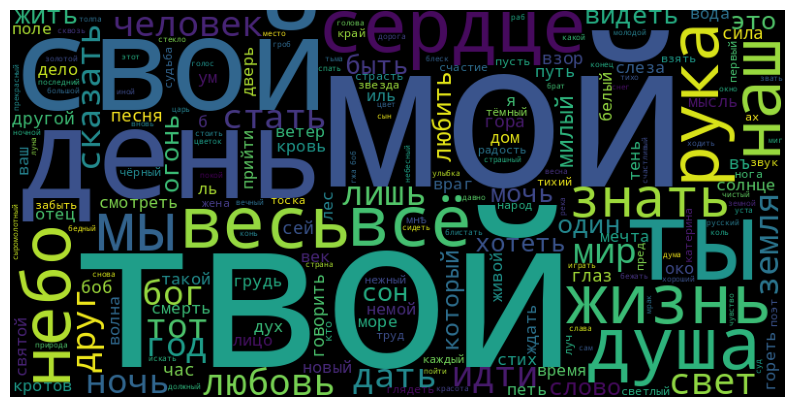

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_data = ' '.join(poems["preprocessed_text"])
wordcloud = WordCloud(width=800,
                      height=400).generate(text_data)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Что ещё можно делать с помощью регулярок?

Искать числовые значения в тексте.

In [ ]:
text = 'Вопросы любви и смерти не волновали Ипполита Матвеевича Воробьянинова, хотя этими вопросами, по роду своей службы, он ведал с 9 утра до 5 вечера ежедневно, с получасовым перерывом для завтрака.'

In [ ]:
print(re.findall(r'\d', text))

['9', '5']


Но так мы найдём именно цифры, а не числа.

In [ ]:
text = 'Как бы примериваясь и приготовляясь к предстоящему движению, силы запада несколько раз в 1805-м, 6-м, 7-м, 9-м году стремятся на восток, крепчая и нарастая. В 1811-м году группа людей, сложившаяся во Франции, сливается в одну огромную группу с серединными народами.'

In [ ]:
print(re.findall(r'\d', text))

['1', '8', '0', '5', '6', '7', '9', '1', '8', '1', '1']


Если мы хотим найти числа определённой длины, например, года, то можем эту длину прописать в кванторе.

In [ ]:
print(re.findall(r'\d{4}', text))

['1805', '1811']


Если нужны числа произвольной длины, то используем `+`.

In [ ]:
print(re.findall(r'\d+', text))

['1805', '6', '7', '9', '1811']


**Задание**. Выделите из текста слова длиной 5.

Можно находить слова с заглавной буквы.

In [ ]:
text = 'Могли бы, взявшись за руки, с Эйфелевой башни - вниз головой: оказались бы среди первых. Тогда мы были приличные люди. А теперь поздно. Нас даже наверх не пустят.'

In [ ]:
print(re.findall(r'\b[A-ZА-ЯЁ]\w*', text))

['Могли', 'Эйфелевой', 'Тогда', 'А', 'Нас']


**Задание**. Выделите слова, начинающиеся с буквы Т (любого регистра).

Можно находить слова, содержащие в себе какую-то букву.

In [ ]:
text = '- Хорошо, что вы мне напомнили,  -  сказал  коммерсант,  - ведь  вы  новичок,  младенец. Вашему процессу всего-то полгода. Слышал, слышал. Такой молодой процесс! А я  уже  передумал  обо всем тысячи раз, для меня нет на свете ничего понятнее.'

In [ ]:
print(re.findall(r'\b\S*[Пп]+\S*\b', text)) # ищем слова с буквой П

['напомнили', 'процессу', 'полгода', 'процесс', 'передумал', 'понятнее']


**Задание**. Выделите слова, содержащие фрагмент 'про'.

`re.findall` находит все вхождения, а с помощью `re.search` можно найти первое (и индексы его начала и конца в параметре `span`).

In [ ]:
print(re.search(r'\b\S*[Пп]+\S*\b', text))

<re.Match object; span=(21, 30), match='напомнили'>


In [ ]:
print(re.search(r'\b\S*[Пп]+\S*\b', text).group(0)) # метод group помогает вывести ТОЛЬКО подстроку

напомнили


**Ещё несколько методов из библиотеки `re`:**

`re.match` проверяет, является ли подстрока началом строки.

In [ ]:
stroka = 'Hello, world!'
print(re.match('Hello', stroka))
print(re.match('Hello', stroka).group(0))

<re.Match object; span=(0, 5), match='Hello'>
Hello


In [ ]:
print(re.match('world', stroka))

None


`re.split` разделяет по указанному разделителю.

In [ ]:
print(re.split(', ', stroka))
print(re.split(r',\s', stroka))

['Hello', 'world!']
['Hello', 'world!']


In [ ]:
print(re.split(r'\d', 'H3ll0w0r1d')) # разделяем по любой цифре

['H', 'll', 'w', 'r', 'd']


`re.compile` помогает записать подстроку в переменную, которую потом можно будет неоднократно использовать.

In [ ]:
substr = re.compile('Hello')

print(substr.match('Hello, world!'))
print(substr.search('Just say Hello!'))

<re.Match object; span=(0, 5), match='Hello'>
<re.Match object; span=(9, 14), match='Hello'>


**Задание**. По мотивам задачи из недавней СР: попробуем разделить строку одновременно по нескольким разделителям.

In [ ]:
text = 'Елизавета,Волкова,русский-10,история-4,физика-9'
## YOUR CODE HERE

**Задание**. Допустим, мы выкачали с сайта текст, в который затесались ссылки. Удалите их.

In [ ]:
text = 'https://luchshie-stihi.ru/Хотите — буду от мяса бешеный — и, как небо, меняя тона — хотите — буду безукоризненно нежный, не мужчина, а — облако в штанах!'
## YOUR CODE HERE

## Дополнительные материалы

Потренироваться с написанием регулярок можно [на этом сайте](https://w3resource.com/python-exercises/re/).